In [17]:
import os

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd
from tifffile import imread
import ffmpeg
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

### Parameters and path

In [56]:
um_per_pixel = 0.117
s_per_frame = 0.1
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/Fig1_example_imgs"

os.chdir(folder_save)
video = imread("Merged-4-cropped.tif")
df_RNA = pd.read_csv("tracks.csv")
df_condensate = pd.read_csv("condensates_AIO-Merged-4-cropped-condensate.csv")

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#6495ED"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

cmap_color_start = (0.753, 0.22, 0.188, 0)
cmap_color_end = (0.753, 0.22, 0.188, 1)
cmap_name = "transparent2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

cmap_track = cm.get_cmap("magma")
# random_numbers = [random.random() for _ in range(df_RNA["trackID"].unique().shape[0])]
random_numbers = [
    0.04417639224249814,
    0.7966422150759658,
    0.12862218701740713,
    0.8344488278878667,
    0.017867915104638254,
    0.5847620343771311,
    0.8400262836835699,
    0.1374874852347936,
    0.7674218070558931,
    0.0026264426394451146,
    0.7049433653852305,
    0.15518520409685355,
    0.7514361098084696,
    0.6454051933472383,
    0.6696084529649057,
    0.4670105496591723,
    0.44595336463439694,
    0.6346802704177533,
    0.9160408235575344,
]
track_colors = [cmap_track(i) for i in random_numbers]

In [3]:
def list_like_string_to_xyarr(list_like_string):
    # example list_like_string structure of polygon coordinates: '[[196, 672], [196, 673], [197, 673], [198, 673], [199, 673], [199, 672], [198, 672], [197, 672]]'
    list_of_xy_string = list_like_string[2:-2].split("], [")

    lst_x = []
    lst_y = []
    for xy_string in list_of_xy_string:
        x, y = xy_string.split(", ")
        lst_x.append(float(x))
        lst_y.append(float(y))

    return np.array(lst_x), np.array(lst_y)

### All Frames with orange track

In [61]:
for frame in track(np.linspace(1, 200, 10, dtype=int)):
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    fig, ax = plt.subplots(1, 1)
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=500,
        vmax=700,
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=0,
        vmax=50,
    )
    # Add contours
    contours = df_condensate[df_condensate["frame"] == frame - 1][
        "contour_coord"
    ].to_list()
    df_condensate[df_condensate["frame"] == frame - 1]
    for cnt in contours:
        x, y = list_like_string_to_xyarr(cnt)
        plt.plot(x, y, lw=2, c="snow")
        # still the last closing line will be missing, get it below
        xlast = [x[-1], x[0]]
        ylast = [y[-1], y[0]]
        plt.plot(xlast, ylast, c="snow", lw=2)
    # Add current circle, except for gaps
    all_avaliable_frames = set(df_RNA["t"].unique())
    if frame - 1 in all_avaliable_frames:
        current_x = df_RNA[df_RNA["t"] == frame - 1]["x"].to_numpy()
        current_y = df_RNA[df_RNA["t"] == frame - 1]["y"].to_numpy()
        plt.scatter(
            current_x,
            current_y,
            marker="o",
            facecolors="none",
            edgecolors="white",
            s=500,
            lw=2,
        )
    # Add track
    # track_ids = df_RNA["trackID"].unique()
    # for trackid in track_ids:
    #     full_track = df_RNA[df_RNA["trackID"] == trackid]
    #     track_till_now = full_track[full_track["t"] <= frame - 1]
    #     t_plot = track_till_now["t"].to_numpy(float)
    #     x_plot = track_till_now["x"].to_numpy(float)
    #     y_plot = track_till_now["y"].to_numpy(float)
    #     for i in range(len(t_plot) - 1):
    #         plt.plot(
    #             x_plot[i : i + 2],
    #             y_plot[i : i + 2],
    #             "-o",
    #             color="white",
    #             lw=2,
    #             ms=3,
    #         )
    plt.text(0, 0, str(round(frame * 0.1, 2)) + " s", fontsize=40, color="white")
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")

    plt.savefig(
        "img_" + str(frame) + ".png",
        format="png",
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )
    plt.close()

Output()

In [62]:
for frame in track(np.linspace(1, 200, 10, dtype=int)):
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    fig, ax = plt.subplots(1, 1)
    # Add contours
    contours = df_condensate[df_condensate["frame"] == frame - 1][
        "contour_coord"
    ].to_list()
    df_condensate[df_condensate["frame"] == frame - 1]
    for cnt in contours:
        x, y = list_like_string_to_xyarr(cnt)
        plt.plot(x, y, lw=2, c="#245696")
        # still the last closing line will be missing, get it below
        xlast = [x[-1], x[0]]
        ylast = [y[-1], y[0]]
        plt.plot(xlast, ylast, c="#245696", lw=2)
    # Add current circle, except for gaps
    all_avaliable_frames = set(df_RNA["t"].unique())
    if frame - 1 in all_avaliable_frames:
        current_x = df_RNA[df_RNA["t"] == frame - 1]["x"].to_numpy()
        current_y = df_RNA[df_RNA["t"] == frame - 1]["y"].to_numpy()
        plt.scatter(
            current_x,
            current_y,
            marker="o",
            facecolors="none",
            edgecolors="#c51e3a",
            s=500,
            lw=2,
        )
    # Add track
    track_ids = df_RNA["trackID"].unique()
    for trackid, c in zip(track_ids, track_colors):
        full_track = df_RNA[df_RNA["trackID"] == trackid]
        track_till_now = full_track[full_track["t"] <= frame - 1]
        t_plot = track_till_now["t"].to_numpy(float)
        x_plot = track_till_now["x"].to_numpy(float)
        y_plot = track_till_now["y"].to_numpy(float)
        for i in range(len(t_plot) - 1):
            plt.plot(
                x_plot[i : i + 2],
                y_plot[i : i + 2],
                "-o",
                color=c,
                lw=2,
                ms=3,
            )
    plt.text(0, 0, str(round(frame * 0.1, 2)) + " s", fontsize=40)
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")

    plt.savefig(
        "track_" + str(frame) + ".png",
        format="png",
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )
    plt.close()

Output()

### test

(-1.8, 37.8, 37.7, 0.2999999999999998)

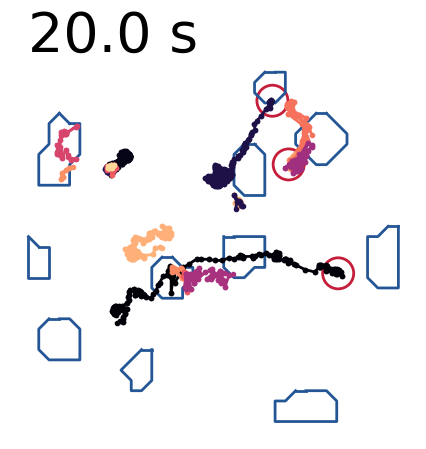

In [60]:
frame = 200
# random_numbers = [random.random() for _ in range(df_RNA["trackID"].unique().shape[0])]
track_colors = [cmap_track(i) for i in random_numbers]
img_blue = video[frame - 1, 1, :, :]
img_red = video[frame - 1, 0, :, :]
fig, ax = plt.subplots(1, 1)
# Add contours
contours = df_condensate[df_condensate["frame"] == frame - 1]["contour_coord"].to_list()
df_condensate[df_condensate["frame"] == frame - 1]
for cnt in contours:
    x, y = list_like_string_to_xyarr(cnt)
    plt.plot(x, y, lw=2, c="#245696")
    # still the last closing line will be missing, get it below
    xlast = [x[-1], x[0]]
    ylast = [y[-1], y[0]]
    plt.plot(xlast, ylast, c="#245696", lw=2)
# Add current circle, except for gaps
all_avaliable_frames = set(df_RNA["t"].unique())
if frame - 1 in all_avaliable_frames:
    current_x = df_RNA[df_RNA["t"] == frame - 1]["x"].to_numpy()
    current_y = df_RNA[df_RNA["t"] == frame - 1]["y"].to_numpy()
    plt.scatter(
        current_x,
        current_y,
        marker="o",
        facecolors="none",
        edgecolors="#c51e3a",
        s=500,
        lw=2,
    )
# Add track
track_ids = df_RNA["trackID"].unique()
for trackid, c in zip(track_ids, track_colors):
    full_track = df_RNA[df_RNA["trackID"] == trackid]
    track_till_now = full_track[full_track["t"] <= frame - 1]
    t_plot = track_till_now["t"].to_numpy(float)
    x_plot = track_till_now["x"].to_numpy(float)
    y_plot = track_till_now["y"].to_numpy(float)
    for i in range(len(t_plot) - 1):
        plt.plot(
            x_plot[i : i + 2],
            y_plot[i : i + 2],
            "-o",
            color=c,
            lw=2,
            ms=3,
        )

plt.text(0, 0, str(round(frame * 0.1, 2)) + " s", fontsize=40)
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")

### All frames with scale bar to video

In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 1)
all_avaliable_frames = set(df["t"].unique())

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"
N = track.shape[0]
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=N
)


def animate(frame):
    ax.clear()
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=3100,
        vmax=5600,
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=2,
        vmax=6,
    )
    # Add current circle, except for gaps
    if frame - 1 in all_avaliable_frames:
        current_x = df[df["t"] == frame - 1]["x"].squeeze()
        current_y = df[df["t"] == frame - 1]["y"].squeeze()
        c = plt.Circle(
            (current_x, current_y),
            1.3,
            color="white",
            fill=False,
            lw=3,
        )
        ax.add_patch(c)
    # Add track
    track = df[df["t"] <= frame - 1]
    t_plot = track["t"].to_numpy(float)
    x_plot = track["x"].to_numpy(float)
    y_plot = track["y"].to_numpy(float)
    for i in range(len(t_plot) - 1):
        plt.plot(
            x_plot[i : i + 2],
            y_plot[i : i + 2],
            "-o",
            color=cmap(i / N),
            lw=2,
        )
    # plt.plot(
    #     track["x"],
    #     track["y"],
    #     color="white",
    #     lw=2,
    #     ls="-",
    #     marker="o",
    # )
    # scale bar
    scale_bar_offset = 0
    scalebar_length_um = 1
    base_x = 11.1
    base_y = 6.7
    scalebar_length_pxl = scalebar_length_um / um_per_pixel
    plt.plot(
        [
            base_x + scale_bar_offset,
            base_x + scale_bar_offset + scalebar_length_pxl,
        ],
        [base_y + scale_bar_offset, base_y + scale_bar_offset],
        "-",
        color="white",
        lw=5,
    )
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    ax.invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")


ani = FuncAnimation(fig, animate, frames=150, interval=20, repeat=False)
writer = animation.FFMpegWriter(fps=25)  # 25 Hz, 0.5x playback (original:50Hz)
ani.save("movie_0point5xplayback.mp4", writer=writer)